# Carga de datos "HVAC"

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")
data

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3,ORDEN
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.000000,26.984179,34.337925,4.266667,...,0.0,0.0,7.954935,22.497906,0,0,100.0,100.0,100.000000,35433
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.866667,26.805664,34.337925,0.000000,...,0.0,0.0,0.588573,22.497906,0,0,-25.0,-25.0,-25.000000,35441
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,26.055836,34.337925,0.000000,...,0.0,0.0,0.000000,22.288696,0,0,-25.0,-25.0,-25.000000,35442
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,25.266325,34.337925,0.000000,...,0.0,0.0,0.000000,22.273752,0,0,-25.0,-25.0,-25.000000,35443
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,25.605207,34.330490,0.000000,...,0.0,0.0,0.000000,22.408245,0,0,-25.0,-25.0,-25.000000,35444
5,2016-01-01 01:15:00,0.888717,38.688263,190.300995,279.843140,553.907654,1.000000,26.717415,34.330490,0.000000,...,0.0,0.0,0.000000,22.617455,0,0,-25.0,-25.0,-25.000000,35445
6,2016-01-01 01:30:00,0.802738,38.688263,176.961700,292.683258,533.081726,1.000000,28.336132,34.300755,0.000000,...,0.0,0.0,0.000000,22.766891,0,0,-25.0,-25.0,-25.000000,35446
7,2016-01-01 01:45:00,0.831385,38.688263,176.713120,269.536377,522.341614,1.000000,29.540056,34.256153,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35447
8,2016-01-01 02:00:00,0.802729,38.688263,176.003754,241.409500,512.430237,1.000000,30.624674,34.236099,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35448
9,2016-01-01 02:15:00,0.898297,38.688263,177.443466,202.532761,470.506317,1.000000,31.644857,34.207573,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35449


## Variables eliminadas por no ser necesarias

In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS", "C_O_P_ INSTALACIÓN GRUPO FRÍO 1",
                       "C_O_P_ INSTALACÍON GRUPO FRÍO 2"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]
data2.shape

(79285, 46)

## Resumen estadístico básico de las variables numéricas
- count: numero de elementos no nulos
- mean: promedio (suma de valores / numero de elementos)
- std: desviacion estandar (que tanto se separan los valores del promedio)
- min: valor minimo
- 25%: primer cuartil
- 50%: segundo cuartil
- 75%: tercer cuartil
- max: valor maximo

In [5]:
describeData2 = data2.describe()
describeData2
describeData2.to_excel("../Datasets/describeHVAC.xlsx")

## Transformación de variables y normalización  

(array([15803.,  5490., 14702., 11876.,  7705.,  6862.,  6890.,  5546.,
         3270.,  1141.]),
 array([-1.39999998,  3.11999995,  7.63999987, 12.15999979, 16.67999971,
        21.19999963, 25.71999955, 30.23999947, 34.75999939, 39.27999932,
        43.79999924]),
 <a list of 10 Patch objects>)

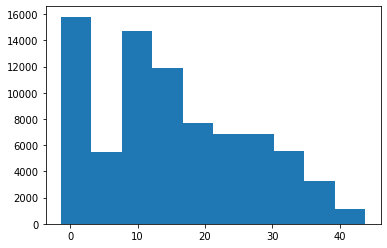

In [6]:
plt.hist(data2["TEMPERATURA EXTERIOR"])